In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
df = pd.read_csv("/Users/gozi/Desktop/Scripting for Data Analysis/hmwk 1/salaries_clean.csv")

In [23]:
df.head()

,index,salary_id,employer_name,location_name,location_state,location_country,location_latitude,location_longitude,job_title,job_title_category,job_title_rank,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus,stock_value_bonus,comments,submitted_at
0,0,1,opower,"san francisco, ca",CA,US,37.77,-122.41,systems engineer,Engineering,NaN,13.0,2.0,125000.0,5000.0,0.0,5000 shares,Don't work here.,3/21/16 12:58
1,1,3,walmart,"bentonville, ar",AR,US,36.36,-94.20,senior developer,Software,Senior,15.0,8.0,65000.0,NaN,5000.0,"3,000",NaN,3/21/16 12:58
2,2,4,vertical knowledge,"cleveland, oh",OH,US,41.47,-81.67,software engineer,Software,NaN,4.0,1.0,86000.0,5000.0,6000.0,0,NaN,3/21/16 12:59
3,3,6,netapp,waltham,NaN,NaN,NaN,NaN,mts,Other,NaN,4.0,0.0,105000.0,5000.0,8500.0,0,NaN,3/21/16 13:00
4,4,12,apple,cupertino,NaN,NaN,NaN,NaN,software engineer,Software,NaN,4.0,3.0,110000.0,5000.0,7000.0,150000,NaN,3/21/16 13:02


In [24]:
df.describe()

,index,salary_id,location_latitude,location_longitude,total_experience_years,employer_experience_years,annual_base_pay,signing_bonus,annual_bonus
count,1655.000000,1655.000000,792.000000,792.000000,1608.000000,1608.000000,1.651000e+03,1.332000e+03,1.336000e+03
mean,827.000000,1684.100906,37.754394,-64.712273,6.756113,2.656163,6.325004e+06,2.240563e+04,1.177552e+04
std,477.901664,932.901390,16.740905,67.090364,5.687004,3.301834,2.461353e+08,3.097990e+05,6.921569e+04
min,0.000000,1.000000,-41.000000,-123.270000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,413.500000,897.000000,37.410000,-102.702500,3.000000,1.000000,6.100000e+04,0.000000e+00,0.000000e+00
50%,827.000000,1711.000000,38.580000,-95.000000,5.000000,2.000000,9.948000e+04,0.000000e+00,5.000000e+02
75%,1240.500000,2477.000000,45.440000,-64.562500,10.000000,3.000000,1.300000e+05,5.000000e+03,1.000000e+04
max,1654.000000,3298.000000,65.000000,174.000000,56.000000,58.000000,1.000000e+10,8.999999e+06,2.000000e+06


In [28]:
#drop columns that aren't needed 
df.drop(['salary_id','location_latitude','location_longitude','comments','submitted_at'], axis=1, inplace=True )

In [31]:
# Replace blank values with 0 for specific columns


columns_to_replace = ['signing_bonus', 'annual_bonus', 'stock_value_bonus']

df[columns_to_replace] = df[columns_to_replace].replace('', 0)


In [75]:
#remove the other category as it's skewing the data
## this code worked when I first ran it, but I reran it and its giving this error and I'm unsure how to fix/remove it without removing all the code 
df_filtered = df[df['job_title_category'] != 'Other']


KeyError: 'job_title_category'

In [69]:
df_filtered2 = df_filtered[(df_filtered['annual_base_pay'] >= 20000) & (df_filtered['annual_base_pay'] <= 500000)]


In [70]:
#avg salary per category
sal_category = round(df_filtered2.groupby(['job_title_category'])['annual_base_pay'].mean(),0)

print(sal_category)

job_title_category
Applied Science    106069.0
Data                82430.0
Engineering        107971.0
Management         114838.0
Operations          88225.0
Software           106256.0
Web                 83512.0
Name: annual_base_pay, dtype: float64


In [71]:
sal_title = round(df_filtered2.groupby(['job_title_category', 'total_experience_years'])['annual_base_pay'].mean(),0)
print(sal_title)

job_title_category  total_experience_years
Applied Science     5.0                        83500.0
                    6.0                       155000.0
                    7.0                        60480.0
                    8.0                        98000.0
                    10.0                       80000.0
                                                ...   
Web                 14.0                      149310.0
                    15.0                      122500.0
                    16.0                       95862.0
                    19.0                       58000.0
                    20.0                      109800.0
Name: annual_base_pay, Length: 138, dtype: float64


In [85]:
exp = round(df_filtered2.groupby(['total_experience_years'])['annual_base_pay'].mean(),0)
print(exp)

total_experience_years
0.00      91022.0
0.50      75240.0
0.75      95000.0
0.90      95000.0
1.00      81068.0
1.33      90000.0
1.50      89238.0
1.60      74500.0
2.00      90926.0
2.50      83502.0
2.75      72200.0
3.00      94310.0
3.50     107812.0
3.75     128500.0
4.00      98690.0
4.50      75600.0
5.00      94427.0
5.50      66000.0
6.00     101772.0
6.50     101750.0
7.00     109445.0
8.00     113772.0
8.50      62500.0
9.00     109840.0
9.75     164000.0
10.00    123481.0
11.00    129864.0
12.00    131980.0
13.00    143500.0
14.00    143019.0
15.00    124644.0
16.00    110094.0
17.00     88440.0
18.00    125857.0
19.00    111000.0
20.00    137133.0
21.00    150000.0
22.00    200000.0
25.00    119167.0
26.00    145000.0
30.00    190000.0
32.00    111000.0
36.00    206000.0
Name: annual_base_pay, dtype: float64


In [72]:
bonus = round(df_filtered2.groupby(['job_title_category'])['signing_bonus'].mean(),0)
print(bonus)

job_title_category
Applied Science      833.0
Data                3334.0
Engineering         4971.0
Management         10346.0
Operations          2857.0
Software            9536.0
Web                  698.0
Name: signing_bonus, dtype: float64


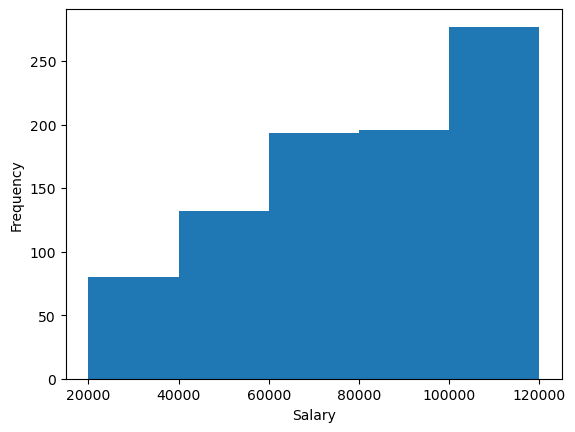

In [80]:
#histogram for salary

plt.xlabel('Salary')
plt.ylabel('Frequency')



plt.hist(df_filtered2.annual_base_pay, bins = [20000,40000,60000,80000,100000,120000])
plt.show()

<AxesSubplot:title={'center':'Jobs Category and Avg Pay'}, xlabel='job_title_category', ylabel='Job Category'>

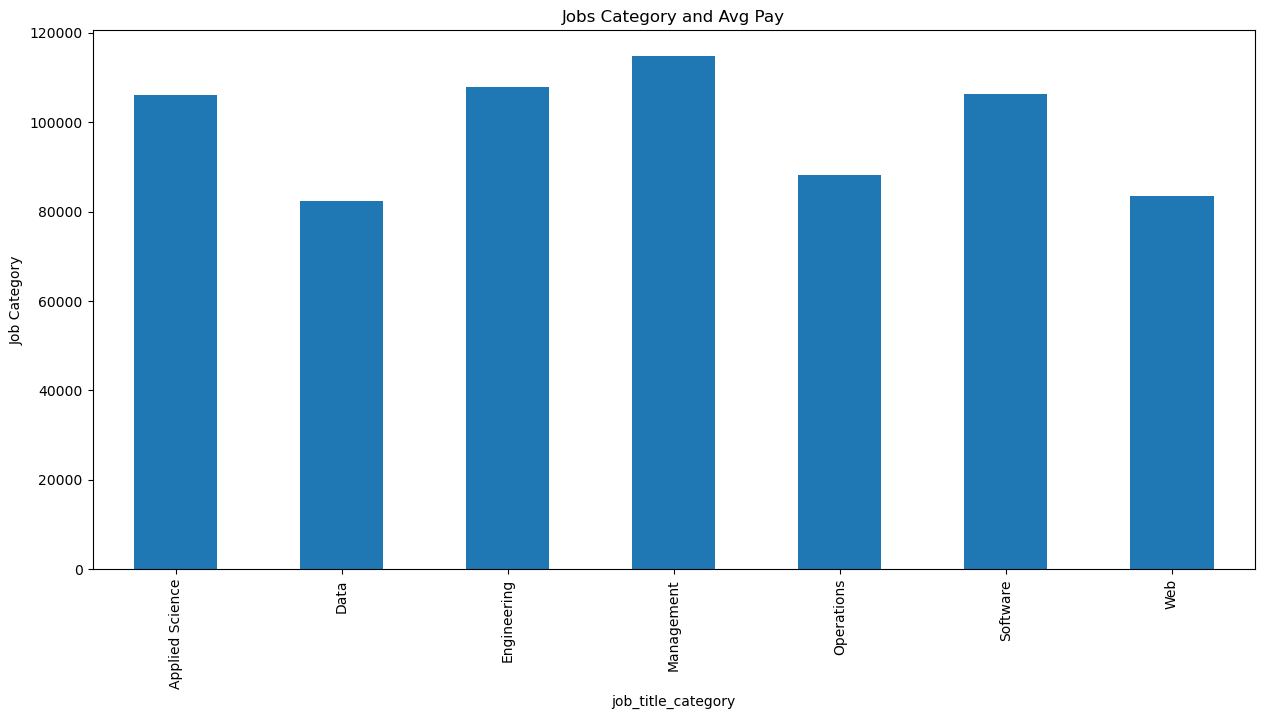

In [84]:
#create bar plot  for the data 
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel('Salary')
ax.set_ylabel('Job Category')
ax.set_title('Jobs Category and Avg Pay')


sal_category.plot(ax=ax, kind='bar')

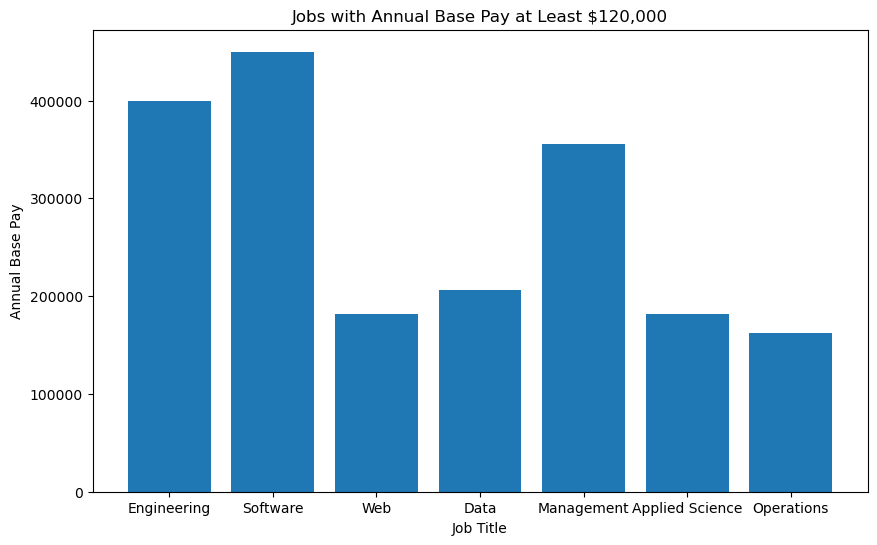

In [83]:
#highest paying jobs 
high_pay_jobs = df_filtered2[df_filtered2['annual_base_pay'] >= 120000]


# Plot the filtered data
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(high_pay_jobs['job_title_category'], high_pay_jobs['annual_base_pay'])
ax.set_xlabel('Job Title')
ax.set_ylabel('Annual Base Pay')
ax.set_title('Jobs with Annual Base Pay at Least $120,000')

plt.show()


<AxesSubplot:title={'center':'Years of Experience and Avg Pay'}, xlabel='total_experience_years', ylabel='Years of Experience'>

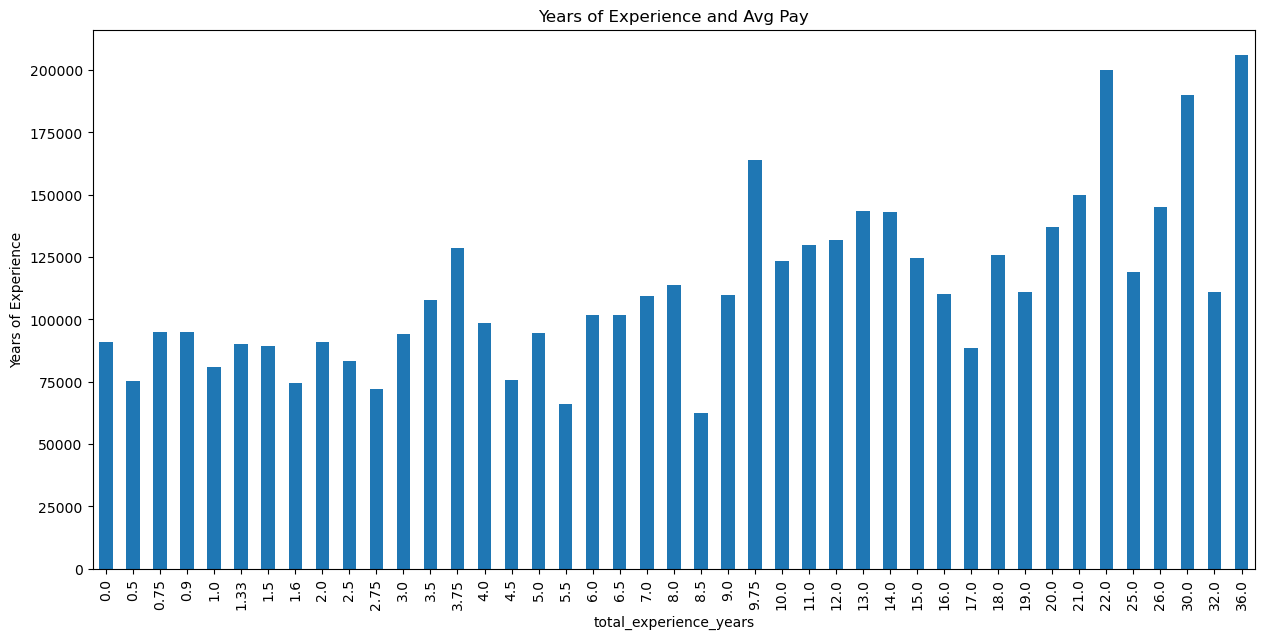

In [86]:
#create bar plot  for the data 
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel('Salary')
ax.set_ylabel('Years of Experience')
ax.set_title('Years of Experience and Avg Pay')


exp.plot(ax=ax, kind='bar')

<AxesSubplot:title={'center':'Years of Experience and Avg Pay For Software'}, xlabel='total_experience_years', ylabel='Years of Experience'>

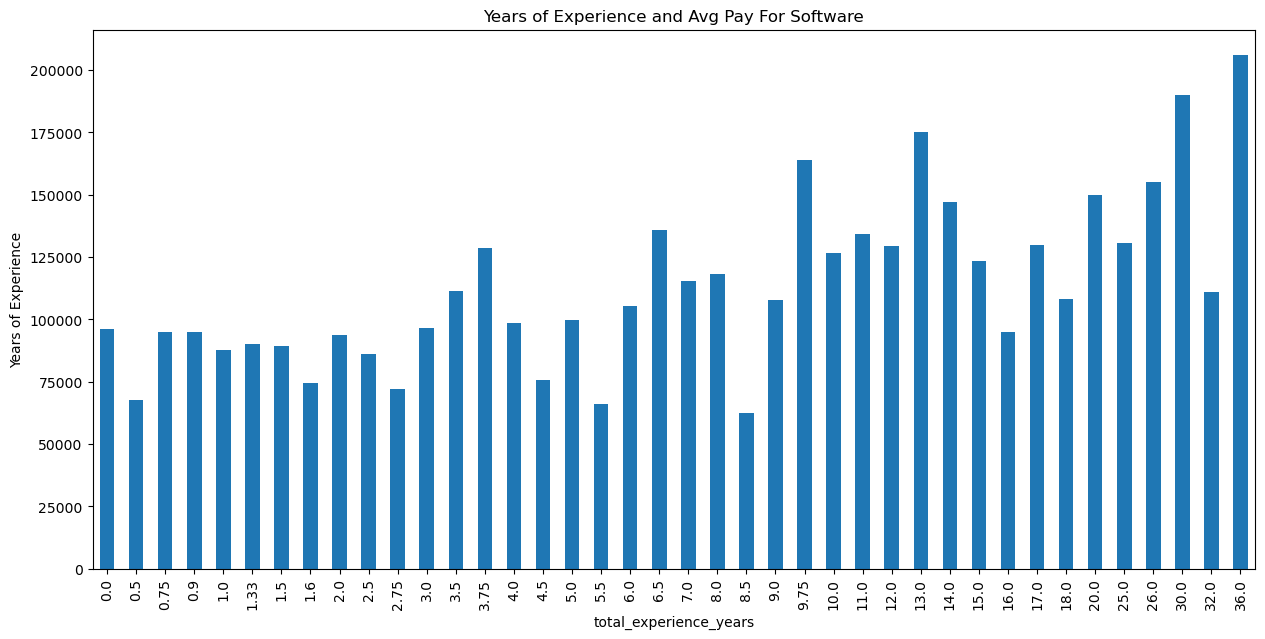

In [96]:
#create bar plot  for the data 

exp2 = round(df_filtered2[df_filtered2['job_title_category'] == 'Software'].groupby(['total_experience_years'])['annual_base_pay'].mean(), 0)
fig, ax = plt.subplots(figsize=(15,7))
ax.set_xlabel('Salary')
ax.set_ylabel('Years of Experience')
ax.set_title('Years of Experience and Avg Pay For Software')


exp2.plot(ax=ax, kind='bar')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


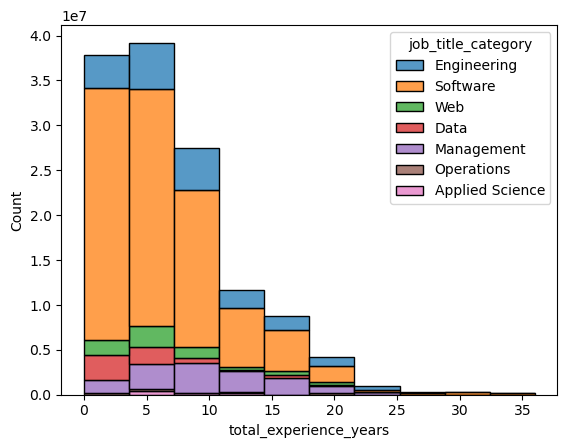

In [91]:
#plotting based on years of exp vs category
ax = sns.histplot(df_filtered2, x='total_experience_years', hue='job_title_category', weights='annual_base_pay', multiple='stack')


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


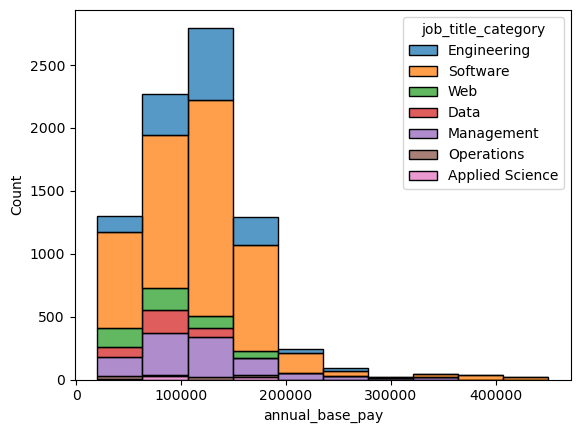

In [92]:
#plotting based on salary vs category

ax = sns.histplot(df_filtered2, x='annual_base_pay', hue='job_title_category', weights='total_experience_years', multiple='stack')


Conclusion

This data had to be cleaned up as there were quite a few outliers but also null values. Once some basic clean up was done, we can see that the highest paying jobs are either in Software, Engineering or Management roles. Based on our data, we had the majority of people in a Software category role, which also has the most roles that pay above 120K. If we look at years of experience compared to pay for Software specifically, we can see that as years of experience increase so does pay, but this role does have a high starting salary for less years of experience. We also plotted the 